In [1]:
!pip install pandas matplotlib scikit-learn

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.2/61.2 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 157.6/157.6 kB 2.8 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 53.3 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 60.5 MB/s eta 0:00:00:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 53.0 MB/s eta 0:00:00:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.7/310.7 kB 7.8 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 39.3 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 7.4 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 32.2 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 50.6 MB/s eta

In [15]:
import numpy as np 
import pandas as pd 
import json
import os
import matplotlib.pyplot as plt
import re 

In [16]:
def read_jsonl(path: str) -> list[dict]:
    """
    """
    with open(path, "r") as jsonl_file:
        object = [json.loads(line.strip()) for line in jsonl_file]
    return object


def write_jsonl(object: list[dict], path: str) -> None:
    """
    """
    with open(path, "w") as jsonl_file:
        for data_dict in object:
            # Write each dictionary as a separate line in the jsonl file
            jsonl_file.write(json.dumps(data_dict) + "\n")

## Read and clean data

In [17]:
embs = read_jsonl('../data/interim/publications_parsed.ndjson')

# read in metadata from 'processed' folder
PROCESSED_PATH = '../data/processed/'
meta = pd.read_csv(os.path.join(PROCESSED_PATH, 'meta_publications_months.csv'), sep=';')

In [18]:
# add publication ID to merge the metadata and data
embs_df = pd.DataFrame(embs).drop(columns=['pub_date'])
embs_df.head()

,title,authors,abstract,sections,references,figures,formulas,doi,path,pub_id
0,Personal Spin D,Uta Frith,,"[{'heading': '', 'text': 'I was familiar with ...",[],"[{'figure_label': '', 'figure_type': 'table', ...",[],,data/raw/publications_manual_export/UTA public...,p1
1,Dimensional or Categorical Approaches to Autis...,Francesca Happé; Uta Frith; J Bralten; K J Van...,,"[{'heading': '', 'text': 'We are grateful for ...",[{'title': 'Autism spectrum disorders and auti...,[],[],10.1007/s10803-020-04728-5,data/raw/publications_manual_export/UTA public...,p2
2,,Uta Frith; H Asperger; U Frith; S Baron-Cohen;...,,"[{'heading': '', 'text': 'Uta Frith began her ...",[{'title': 'Die 'autistischen psychopathen' im...,"[{'figure_label': '', 'figure_type': '', 'figu...",[],,data/raw/publications_manual_export/UTA public...,p3
3,Autistic adolescents show atypical activation ...,Sarah J White; Uta Frith; Julian Rellecke; Zai...,Some autistic children pass classic Theory of ...,"[{'heading': 'Introduction', 'text': 'One of t...",[{'title': 'Prevalence of disorders of the aut...,"[{'figure_label': '1', 'figure_type': '', 'fig...",[],10.1016/j.neuropsychologia.2013.12.013,data/raw/publications_manual_export/UTA public...,p4
4,,Uta Frith,One contribution of 16 to a discussion meeting...,"[{'heading': '', 'text': 'Depression, schizoph...",[],[],[],10.1098/rstb.2017.0361,data/raw/publications_manual_export/UTA public...,p5


In [19]:
# add publication date column
dates = []
for i, row in meta.iterrows():
    year_month = f"{int(row['year'])}-{int(row['month'])}-01"
    pub_date = pd.to_datetime(year_month, format='%Y-%m-%d')
    dates.append(pub_date)

meta['date'] = dates
meta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272 entries, 0 to 271
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   pub_id  272 non-null    object        
 1   path    272 non-null    object        
 2   doi     142 non-null    object        
 3   source  272 non-null    object        
 4   year    272 non-null    float64       
 5   month   272 non-null    int64         
 6   date    272 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 15.0+ KB


In [20]:
# only include publications with quality data
quality = pd.read_csv(os.path.join(PROCESSED_PATH, 'meta_publications_quality.csv'))
# clean up quality
rows_to_include = []
for i, group in quality.groupby('pub_id'):
    # pick the pub_id with high n_characters
    top_row_in_grp = group['n_characters'].idxmax()
    rows_to_include.append(top_row_in_grp)

quality_short = quality.loc[rows_to_include]
quality_short.drop(columns=['Unnamed: 0', 'year', 'date', 'title', 'source'], inplace=True)
quality_short.reset_index(drop=True, inplace=True)

In [21]:
# merge embeddings with metadata
df = embs_df.merge(meta[['pub_id', 'year', 'source', 'date']], on='pub_id', how='left')
df = df.merge(quality_short, on='pub_id', how='left')
# sort by date!
df = df.sort_values('date')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 272 entries, 188 to 271
Data columns (total 90 columns):
 #   Column                                  Non-Null Count  Dtype         
---  ------                                  --------------  -----         
 0   title                                   272 non-null    object        
 1   authors                                 272 non-null    object        
 2   abstract                                272 non-null    object        
 3   sections                                272 non-null    object        
 4   references                              272 non-null    object        
 5   figures                                 272 non-null    object        
 6   formulas                                272 non-null    object        
 7   doi_x                                   272 non-null    object        
 8   path_x                                  272 non-null    object        
 9   pub_id                                  272 non-null    o

In [22]:
# take the first 13 columns
df_subset = df.iloc[:, 0:13]
df_subset.head()

,title,authors,abstract,sections,references,figures,formulas,doi_x,path_x,pub_id,year,source,date
188,Social communication and its disorder in autis...,Uta F R I T H; H Asperger; U Frith; A J Bailey...,Autism is a devastating developmental disorder...,"[{'heading': '', 'text': 'early part of the ce...",[{'title': 'Diagnostic and statistical manual ...,"[{'figure_label': '', 'figure_type': '', 'figu...",[],,data/raw/publications_manual_export/UTA public...,p189,1969.0,parsing,1969-01-01
189,Recent e x p e r i m e n t s o n autistic chil...,U Ta Frith L O N D O N; © Gordon; B Hermelin; ...,THe ArEas of cognition and social skills proba...,"[{'heading': '', 'text': 'research is taking t...",[{'title': 'autism: can autistic children make...,"[{'figure_label': '', 'figure_type': '', 'figu...",[],,data/raw/publications_manual_export/UTA public...,p190,1969.0,parsing,1969-09-01
186,Cognitive explanations of autism,U Frith; L Capps; N Yirmiya; M Sigman; A J Bai...,A brief review of the theory of mind account o...,"[{'heading': '', 'text': 'Initially, these pio...",[{'title': 'Understanding of simple and comple...,"[{'figure_label': '', 'figure_type': '', 'figu...",[],,data/raw/publications_manual_export/UTA public...,p187,1970.0,parsing,1970-01-01
185,Intrusion of orthographic knowledge on p h o n...,Karin Landerl; Heinz Wimmer; D R E S S F O R C...,In three typical phonological awareness tasks ...,"[{'heading': '', 'text': 'whether such a close...",[{'title': 'Proto-literate knowledge: Antecede...,"[{'figure_label': '', 'figure_type': '', 'figu...",[],,data/raw/publications_manual_export/UTA public...,p186,1970.0,parsing,1970-06-01
187,,Francesca Happé; Stefan Ehlers; Paul Fletcher;...,T H E ability t o attribute mental states to o...,"[{'heading': '', 'text': 'C A , + Correspondin...",[],"[{'figure_label': '', 'figure_type': '', 'figu...",[],,data/raw/publications_manual_export/UTA public...,p188,1970.0,parsing,1970-08-01


In [23]:
# after sorting, the indices are changes - reset them
df_reset = df_subset.reset_index(drop=True)

In [24]:
# find na value and remove
df_reset[df_reset['year'].isna()]

,title,authors,abstract,sections,references,figures,formulas,doi_x,path_x,pub_id,year,source,date
271,Animated triangles: An eye tracking investigation,Annette M Klein; Jan Zwickel; Wolfgang Prinz; ...,"This article may be used for research, teachin...","[{'heading': '', 'text': 'In their classic wor...",[{'title': 'Do triangles play tricks? Attribut...,"[{'figure_label': '1', 'figure_type': '', 'fig...",[],10.1080/17470210802384214,data/raw/publications_manual_export/UTA public...,p272,NaN,NaN,NaT


In [25]:
df_reset = df_reset.drop(271)

## Calculate frequencies

Calculate the frequencies of words to examine if they change over time:

Subjects --> Participants

Theory of Mind --> Mentalizing

Children --> Individuals

Behavior --> Cognitive Process


In [26]:
def word_counter(df, string):
    # initialize empty list
    word_count = []

    for i in range(len(df)):

        # get abstract (it's in a different column from the rest)
        abstracts = df['abstract'][i]

        # get sections
        sections = df['sections'][i]

        # add abstracts to the full text
        text_full = abstracts

        # extract the text from each section and add to the 'full text' variable
        for i in range(len(sections)):
            text = sections[i]['text']
            text_full += text 

        # convert to lowercase
        text_full_lower = text_full.lower()

        # clean strange spaces in between words
        cleaned_text = re.sub(r'\b(\w(?:\s+\w)+)\b', lambda m: m.group(1).replace(' ', ''), text_full_lower)

        #print(cleaned_text)
        
        # make sure to catch every variant of ToM
        if string == 'theory of mind':
            count = cleaned_text.count(string)
            count += cleaned_text.count('theoryof mind')
            count += cleaned_text.count('theory ofmind')
            count += cleaned_text.count('theoryofmind')
            count += cleaned_text.count('tom')
        
        # same for cognitive process
        elif string == 'cognitive process':
            count = cleaned_text.count(string)
            count += cleaned_text.count('cognitiveprocess')
        
        else:
            count = cleaned_text.count(string)

        # append to the empty word_count list
        word_count.append(count)

    return word_count

In [27]:
strings = ['subjects', 'participants', 'theory of mind', 'mentalizing', 'children', 'individuals', 'behavior', 'cognitive process']

for str in strings:
    count = word_counter(df_reset, str)
    df_reset[f'{str}_count'] = count

In [28]:
df_reset.head()

,title,authors,abstract,sections,references,figures,formulas,doi_x,path_x,pub_id,...,source,date,subjects_count,participants_count,theory of mind_count,mentalizing_count,children_count,individuals_count,behavior_count,cognitive process_count
0,Social communication and its disorder in autis...,Uta F R I T H; H Asperger; U Frith; A J Bailey...,Autism is a devastating developmental disorder...,"[{'heading': '', 'text': 'early part of the ce...",[{'title': 'Diagnostic and statistical manual ...,"[{'figure_label': '', 'figure_type': '', 'figu...",[],,data/raw/publications_manual_export/UTA public...,p189,...,parsing,1969-01-01,1,0,18,0,15,16,0,0
1,Recent e x p e r i m e n t s o n autistic chil...,U Ta Frith L O N D O N; © Gordon; B Hermelin; ...,THe ArEas of cognition and social skills proba...,"[{'heading': '', 'text': 'research is taking t...",[{'title': 'autism: can autistic children make...,"[{'figure_label': '', 'figure_type': '', 'figu...",[],,data/raw/publications_manual_export/UTA public...,p190,...,parsing,1969-09-01,2,0,1,0,56,0,0,1
2,Cognitive explanations of autism,U Frith; L Capps; N Yirmiya; M Sigman; A J Bai...,A brief review of the theory of mind account o...,"[{'heading': '', 'text': 'Initially, these pio...",[{'title': 'Understanding of simple and comple...,"[{'figure_label': '', 'figure_type': '', 'figu...",[],,data/raw/publications_manual_export/UTA public...,p187,...,parsing,1970-01-01,0,0,26,1,11,13,0,0
3,Intrusion of orthographic knowledge on p h o n...,Karin Landerl; Heinz Wimmer; D R E S S F O R C...,In three typical phonological awareness tasks ...,"[{'heading': '', 'text': 'whether such a close...",[{'title': 'Proto-literate knowledge: Antecede...,"[{'figure_label': '', 'figure_type': '', 'figu...",[],,data/raw/publications_manual_export/UTA public...,p186,...,parsing,1970-06-01,4,0,4,0,70,0,0,0
4,,Francesca Happé; Stefan Ehlers; Paul Fletcher;...,T H E ability t o attribute mental states to o...,"[{'heading': '', 'text': 'C A , + Correspondin...",[],"[{'figure_label': '', 'figure_type': '', 'figu...",[],,data/raw/publications_manual_export/UTA public...,p188,...,parsing,1970-08-01,12,0,24,11,2,8,0,1


In [29]:
grouped = df_reset.groupby("year")[['subjects_count', 'participants_count', 'theory of mind_count', 'mentalizing_count', "children_count", 'individuals_count', 'behavior_count', 'cognitive process_count']].sum()

In [30]:
grouped.head()

,subjects_count,participants_count,theory of mind_count,mentalizing_count,children_count,individuals_count,behavior_count,cognitive process_count
year,,,,,,,,
1969.0,3,0,19,0,71,16,0,1
1970.0,16,0,54,12,83,21,0,1
1971.0,4,0,30,0,59,9,2,1
1972.0,15,0,12,0,85,1,0,1
1973.0,3,21,51,16,78,10,6,1


In [162]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

colnames = list(grouped.columns)

scaled_data = scaler.fit_transform(grouped[colnames])

# Create new colnames for the scaled values
scaled_colnames = [str + '_scaled' for str in strings]

scaled_df = pd.DataFrame(scaled_data, columns=scaled_colnames, index=grouped.index)

grouped_scaled = pd.concat([grouped, scaled_df], axis=1)

grouped_scaled.head()

,subjects_count,participants_count,theory of mind_count,mentalizing_count,children_count,individual_count,behavior_count,cognitive process_count,subjects_scaled,participants_scaled,theory of mind_scaled,mentalizing_scaled,children_scaled,individual_scaled,behavior_scaled,cognitive process_scaled
year,,,,,,,,,,,,,,,,
1969.0,3,0,19,0,71,17,0,1,0.017442,0.000000,0.077551,0.000000,0.146392,0.088542,0.000000,0.045455
1970.0,16,0,54,12,83,26,0,1,0.093023,0.000000,0.220408,0.117647,0.171134,0.135417,0.000000,0.045455
1971.0,4,0,30,0,59,16,2,1,0.023256,0.000000,0.122449,0.000000,0.121649,0.083333,0.013793,0.045455
1972.0,15,0,12,0,85,3,0,1,0.087209,0.000000,0.048980,0.000000,0.175258,0.015625,0.000000,0.045455
1973.0,3,21,51,16,78,30,6,1,0.017442,0.159091,0.208163,0.156863,0.160825,0.156250,0.041379,0.045455


### Subjects vs Participants

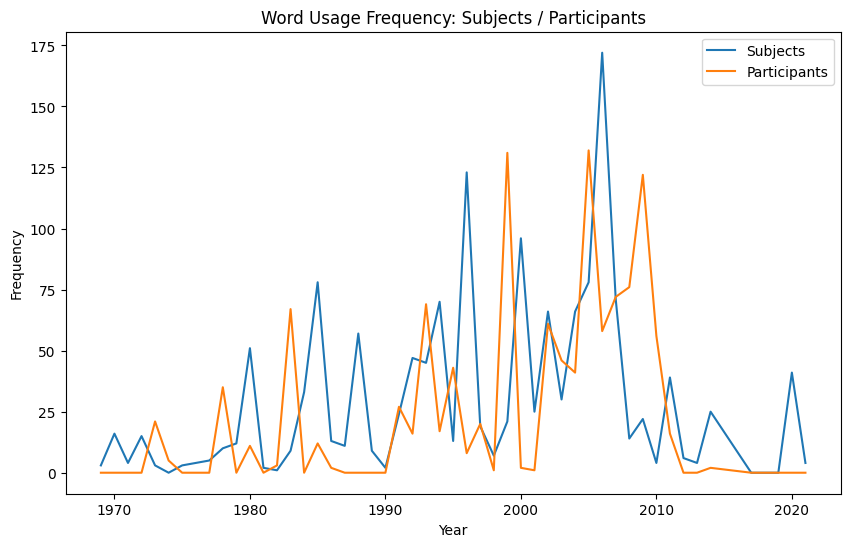

In [31]:
grouped['subjects_count'].plot(kind='line', figsize=(10, 6), label = 'Subjects')
grouped['participants_count'].plot(kind='line', figsize=(10, 6), label = 'Participants')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Word Usage Frequency: Subjects / Participants')
plt.show()


### Theory of Mind vs Mentalizing

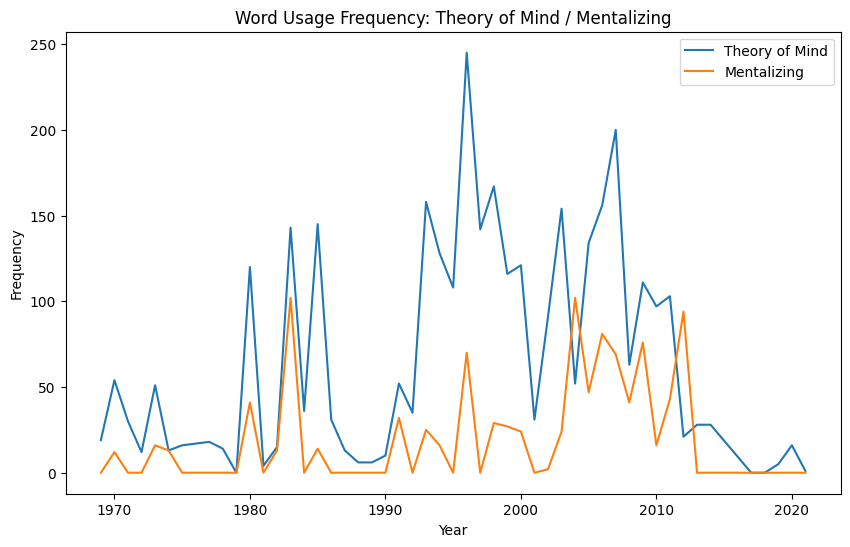

In [32]:
grouped['theory of mind_count'].plot(kind='line', figsize=(10, 6), label = 'Theory of Mind')
grouped['mentalizing_count'].plot(kind='line', figsize=(10, 6), label = 'Mentalizing')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Word Usage Frequency: Theory of Mind / Mentalizing')
plt.show()

### Children vs Individuals


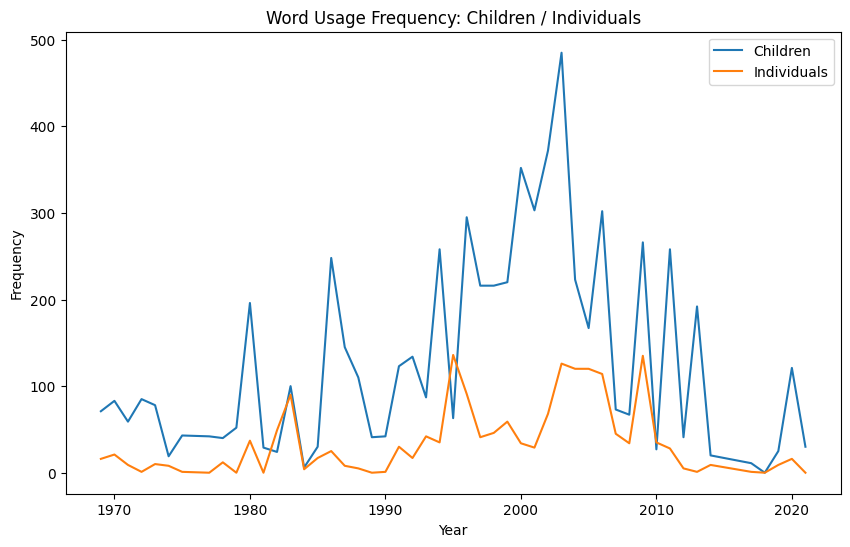

In [33]:
grouped['children_count'].plot(kind='line', figsize=(10, 6), label = 'Children')
grouped['individuals_count'].plot(kind='line', figsize=(10, 6), label = 'Individuals')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Word Usage Frequency: Children / Individuals')
plt.show()

### Behavior vs Cognitive Process


Text(0.5, 1.0, 'Word Usage Frequency: Behavior / Cognitive Process')

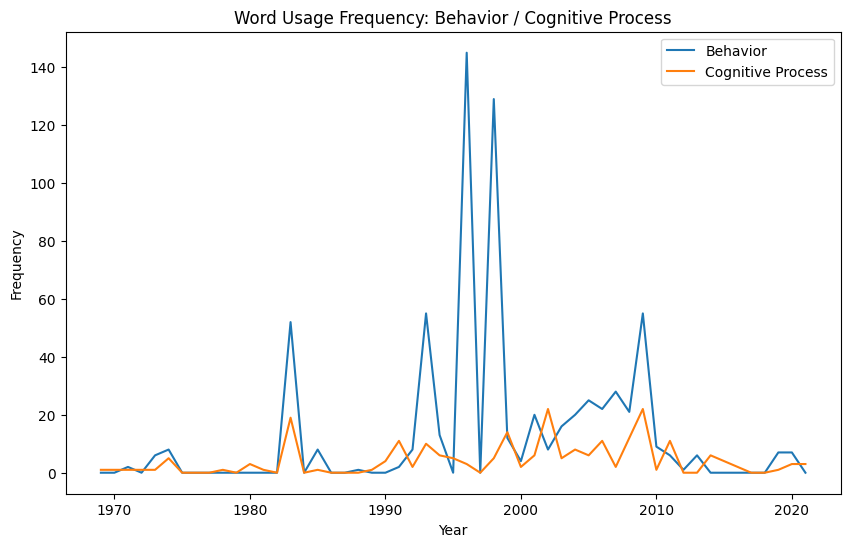

In [34]:
grouped['behavior_count'].plot(kind='line', figsize=(10, 6), label = 'Behavior')
grouped['cognitive process_count'].plot(kind='line', figsize=(10, 6), label = 'Cognitive Process')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Word Usage Frequency: Behavior / Cognitive Process')